In [1]:
!pip install numpy==1.24.3 pandas==2.2.2 scipy --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 778.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.

In [1]:
!pip install mediapipe

In [2]:
import os
import re
import cv2
from google.colab.patches import cv2_imshow
import mediapipe as mp

import math
import json
import glob
import numpy as np
import pandas as pd
import gc  # ✅ Garbage Collector 추가
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor
import time

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## 랜드마크 작동 테스트

In [ ]:
img_path = '/content/drive/MyDrive/DMS/data/YawDD dataset/yawDD_frames_12x/Yawning/dash2-FemaleNoGlasses-clip-1_part1/frame000009.jpg'
yawn_img = cv2.imread(img_path, cv2.IMREAD_COLOR)

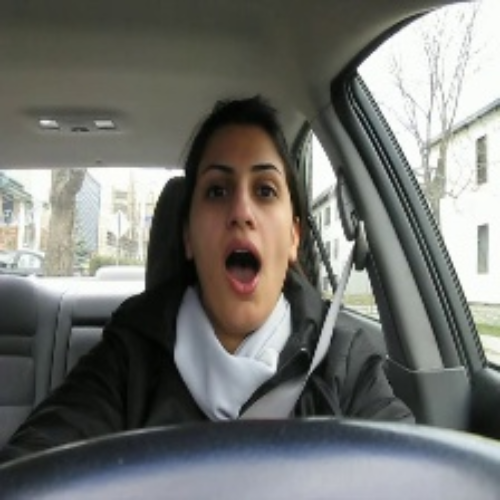

In [ ]:
yawn_img = cv2.resize(yawn_img, (500, 500))
cv2_imshow(yawn_img)

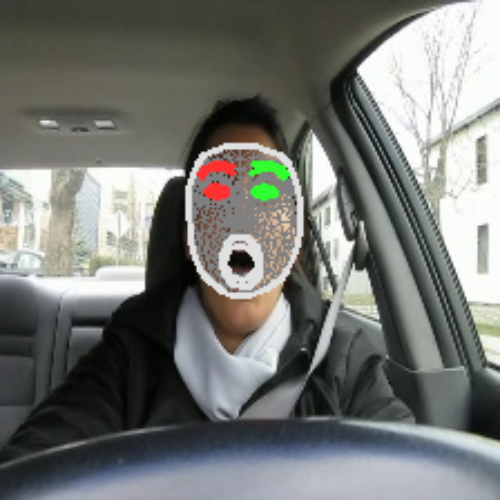

In [ ]:
# face_mesh 객체, drawing 객체
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

IMAGE_FILES = [img_path]

# face mesh 그리기 위한 설정:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    # BGR -> RGB
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # face mesh 그려주는 부분
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
    # print('face_landmarks:', face_landmarks)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION, #
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS, #
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES, #
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    # 그려진 face mesh 이미지 저장
    # cv2.imwrite('/home/ubuntu/app/annotated_image' + str(idx) + '.png', annotated_image)
    annotated_image = cv2.resize(annotated_image, (500,500))
    cv2_imshow(annotated_image)

In [ ]:
mp_face_mesh.FACEMESH_LIPS

frozenset({(0, 267),
           (13, 312),
           (14, 317),
           (17, 314),
           (37, 0),
           (39, 37),
           (40, 39),
           (61, 146),
           (61, 185),
           (78, 95),
           (78, 191),
           (80, 81),
           (81, 82),
           (82, 13),
           (84, 17),
           (87, 14),
           (88, 178),
           (91, 181),
           (95, 88),
           (146, 91),
           (178, 87),
           (181, 84),
           (185, 40),
           (191, 80),
           (267, 269),
           (269, 270),
           (270, 409),
           (310, 415),
           (311, 310),
           (312, 311),
           (314, 405),
           (317, 402),
           (318, 324),
           (321, 375),
           (324, 308),
           (375, 291),
           (402, 318),
           (405, 321),
           (409, 291),
           (415, 308)})

In [ ]:
mp_face_mesh.FACEMESH_LEFT_EYE

frozenset({(249, 390),
           (263, 249),
           (263, 466),
           (373, 374),
           (374, 380),
           (380, 381),
           (381, 382),
           (382, 362),
           (384, 398),
           (385, 384),
           (386, 385),
           (387, 386),
           (388, 387),
           (390, 373),
           (398, 362),
           (466, 388)})

In [ ]:
mp_face_mesh.FACEMESH_RIGHT_EYE

frozenset({(7, 163),
           (33, 7),
           (33, 246),
           (144, 145),
           (145, 153),
           (153, 154),
           (154, 155),
           (155, 133),
           (157, 173),
           (158, 157),
           (159, 158),
           (160, 159),
           (161, 160),
           (163, 144),
           (173, 133),
           (246, 161)})

### 입 좌표 확인

In [ ]:
# MediaPipe Face Mesh 초기화
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)

yawn_img = cv2.resize(yawn_img, (4000, 4000))

# BGR -> RGB 변환
rgb_image = cv2.cvtColor(yawn_img, cv2.COLOR_BGR2RGB)

# 얼굴 랜드마크 검출
results = face_mesh.process(rgb_image)

# 얼굴 랜드마크 시각화
if results.multi_face_landmarks:
    annotated_image = yawn_img.copy()
    for face_landmarks in results.multi_face_landmarks:
        for idx, landmark in enumerate(face_landmarks.landmark):
            h, w, _ = yawn_img.shape
            x, y = int(landmark.x * w), int(landmark.y * h)
            cv2.putText(annotated_image, str(idx), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1)

    # 이미지 출력
    cv2_imshow(annotated_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

## Main

In [ ]:
# 파일 경로 탐색
yawndd_root = "/content/drive/MyDrive/DMS/data/YawDD dataset/YawDD_adjusted_frames_resized/"
dmd_root = "/content/drive/MyDrive/DMS/data/DMD/dmd_frames_resized/"

print(os.listdir(yawndd_root))
print(os.listdir(dmd_root))

['yawn_mirror', 'normal_mirror', 'yawn_dash', 'talking_mirror_ignore']
['Normal', 'PhoneCall', 'Text', 'yawn']


In [ ]:
# 프레임이 저장된 루트 경로
yawn_label_dir = ['yawn_mirror', 'normal_mirror', 'yawn_dash', 'talking_mirror_ignore']

data = [] # 결과 저장

for label_dir in yawn_label_dir[:-1]:
    label_path = os.path.join(yawndd_root, label_dir)

    try: # yawn_mirror → 클래스, 카메라 위치 분리
        label_class, camera_angle = label_dir.split('_')
    except ValueError:
        print(f"[경고] 잘못된 라벨 디렉토리명: {label_dir}")
        continue

    for clip_dir in os.listdir(label_path):
        clip_path = os.path.join(label_path, clip_dir)

        for frame_file in os.listdir(clip_path):
            if not frame_file.endswith(".jpg"):
                continue

            frame_path = os.path.join(clip_path, frame_file)

            # 프레임 번호 추출 (frame000123.jpg → 123)
            match = re.search(r'frame(\d+)\.jpg', frame_file)
            frame_number = int(match.group(1)) if match else -1

            data.append({
                "frame_path": frame_path,
                "label": label_class,
                "camera": camera_angle,
                "clip_id": clip_dir,
                "frame_no": frame_number
            })

In [ ]:
yawn_df = pd.DataFrame(data)
# 프레임 번호 기준 정렬
yawn_df = yawn_df.sort_values(by=["clip_id", "frame_no"]).reset_index(drop=True)
yawn_df.head()

,frame_path,label,camera,clip_id,frame_no
0,/content/drive/MyDrive/DMS/data/YawDD dataset/...,yawn,mirror,1-FemaleNoGlasses-Yawning-clip-0,0
1,/content/drive/MyDrive/DMS/data/YawDD dataset/...,yawn,mirror,1-FemaleNoGlasses-Yawning-clip-0,1
2,/content/drive/MyDrive/DMS/data/YawDD dataset/...,yawn,mirror,1-FemaleNoGlasses-Yawning-clip-0,2
3,/content/drive/MyDrive/DMS/data/YawDD dataset/...,yawn,mirror,1-FemaleNoGlasses-Yawning-clip-0,3
4,/content/drive/MyDrive/DMS/data/YawDD dataset/...,yawn,mirror,1-FemaleNoGlasses-Yawning-clip-0,4


In [ ]:
for label_dir in os.listdir(dmd_root):
    label_path = os.path.join(dmd_root, label_dir)
    print(label_path)

/content/drive/MyDrive/DMS/data/DMD/dmd_frames_resized/Normal
/content/drive/MyDrive/DMS/data/DMD/dmd_frames_resized/PhoneCall
/content/drive/MyDrive/DMS/data/DMD/dmd_frames_resized/Text
/content/drive/MyDrive/DMS/data/DMD/dmd_frames_resized/yawn


In [ ]:
data = [] # 결과 저장

for label_dir in os.listdir(dmd_root):
    label_path = os.path.join(dmd_root, label_dir)

    for clip_dir in os.listdir(label_path):
        clip_path = os.path.join(label_path, clip_dir)

        for frame_file in os.listdir(clip_path):
            if not frame_file.endswith(".jpg"):
                continue

            frame_path = os.path.join(clip_path, frame_file)

            # 프레임 번호 추출 (frame000123.jpg → 123)
            match = re.search(r'frame(\d+)\.jpg', frame_file)
            frame_number = int(match.group(1)) if match else -1

            data.append({
                "frame_path": frame_path,
                "label": label_dir.lower(),
                "camera": np.nan,
                "clip_id": clip_dir,
                "frame_no": frame_number
            })

dmd_df = pd.DataFrame(data)
# 프레임 번호 기준 정렬
dmd_df = dmd_df.sort_values(by=["clip_id", "frame_no"]).reset_index(drop=True)
dmd_df.head()

,frame_path,label,camera,clip_id,frame_no
0,/content/drive/MyDrive/DMS/data/DMD/dmd_frames...,yawn,NaN,face_2019-03-07-16;31;48_9_0.avi,0
1,/content/drive/MyDrive/DMS/data/DMD/dmd_frames...,yawn,NaN,face_2019-03-07-16;31;48_9_0.avi,1
2,/content/drive/MyDrive/DMS/data/DMD/dmd_frames...,yawn,NaN,face_2019-03-07-16;31;48_9_0.avi,2
3,/content/drive/MyDrive/DMS/data/DMD/dmd_frames...,yawn,NaN,face_2019-03-07-16;31;48_9_0.avi,3
4,/content/drive/MyDrive/DMS/data/DMD/dmd_frames...,yawn,NaN,face_2019-03-07-16;31;48_9_0.avi,4


In [ ]:
print('yawndd: ', yawn_df.shape)
print('dmd: ', dmd_df.shape)

yawndd:  (10190, 5)
dmd:  (135475, 5)


In [ ]:
yawn_df.groupby(['label', 'camera']).count()

frame_path  clip_id  frame_no
label  camera                               
normal mirror        4037     4037      4037
yawn   dash          1434     1434      1434
       mirror        4719     4719      4719

In [ ]:
dmd_df.groupby(['label']).count()

,frame_path,camera,clip_id,frame_no
label,,,,
normal,88488,0,88488,88488
phonecall,31837,0,31837,31837
text,13825,0,13825,13825
yawn,1325,0,1325,1325


In [ ]:
total_df = pd.concat([yawn_df, dmd_df], axis=0).reset_index(drop=True)

In [ ]:
total_df.shape

(145665, 5)

In [ ]:
total_df.to_csv("/content/drive/MyDrive/DMS/data/total_df.csv", index=False)

## EAR, MAR 추출

In [ ]:
total_df= pd.read_csv("/content/drive/MyDrive/DMS/data/total_df.csv")
total_df.head()

<ipython-input-4-238aaa76bc3e>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  total_df= pd.read_csv("/content/drive/MyDrive/DMS/data/total_df.csv")


,frame_path,label,camera,clip_id,frame_no
0,/content/drive/MyDrive/DMS/data/YawDD dataset/...,yawn,mirror,1-FemaleNoGlasses-Yawning-clip-0,0
1,/content/drive/MyDrive/DMS/data/YawDD dataset/...,yawn,mirror,1-FemaleNoGlasses-Yawning-clip-0,1
2,/content/drive/MyDrive/DMS/data/YawDD dataset/...,yawn,mirror,1-FemaleNoGlasses-Yawning-clip-0,2
3,/content/drive/MyDrive/DMS/data/YawDD dataset/...,yawn,mirror,1-FemaleNoGlasses-Yawning-clip-0,3
4,/content/drive/MyDrive/DMS/data/YawDD dataset/...,yawn,mirror,1-FemaleNoGlasses-Yawning-clip-0,4


In [ ]:
# Mediapipe 초기화
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

# 입술 랜드마크 번호
upper_lip_landmarks = [191, 80, 81, 82, 13, 312, 311, 310, 415]
lower_lip_landmarks = [95, 88, 178, 87, 14, 317, 402, 318, 324]
mouth_corners = [78, 308]  # 입 좌우 끝

# MAR 계산 함수
def calculate_mar(landmarks):
    """주어진 Mediapipe 얼굴 랜드마크에서 MAR을 계산하는 함수"""
    vertical_distances = []
    landmarks_list = []  # 랜드마크 좌표 저장용

    for upper, lower in zip(upper_lip_landmarks, lower_lip_landmarks):
        p1 = np.array([landmarks[upper].x, landmarks[upper].y])  # 윗입술
        p2 = np.array([landmarks[lower].x, landmarks[lower].y])  # 아랫입술
        vertical_distances.append(np.linalg.norm(p1 - p2))  # 유클리드 거리 계산
        landmarks_list.append((float(p1[0]), float(p1[1])))  # (x, y) 좌표 저장

    # 평균 세로 거리 계산
    mean_vertical_distance = np.mean(vertical_distances)

    # 입 좌우 가로 거리 계산
    left_corner = np.array([landmarks[mouth_corners[0]].x, landmarks[mouth_corners[0]].y])
    right_corner = np.array([landmarks[mouth_corners[1]].x, landmarks[mouth_corners[1]].y])
    horizontal_distance = np.linalg.norm(left_corner - right_corner)

    # MAR 계산
    mar = mean_vertical_distance / horizontal_distance
    return mar, horizontal_distance, mean_vertical_distance, landmarks_list

# 왼쪽 눈 랜드마크 번호
left_upper = [398, 384, 385, 386, 387, 388, 466]
left_lower = [382, 381, 380, 374, 373, 390, 249]
left_corners = [362, 263]  # 좌우 끝점

# 오른쪽 눈 랜드마크 번호
right_upper = [246, 161, 160, 159, 158, 157, 173]
right_lower = [7, 163, 144, 145, 153, 154, 155]
right_corners = [33, 133]  # 수정된 부분: 오른쪽 눈 끝점을 정확히 설정

def calculate_ear(landmarks, upper_indices, lower_indices, corner_indices):
    """
    주어진 랜드마크에서 EAR(Eye Aspect Ratio) 값을 계산하는 함수.

    landmarks: Mediapipe 얼굴 랜드마크 리스트
    upper_indices: 윗눈꺼풀 랜드마크 번호 리스트
    lower_indices: 아랫눈꺼풀 랜드마크 번호 리스트
    corner_indices: 눈 좌우 끝 랜드마크 번호 리스트
    :return: EAR 값
    """
    vertical_distances = []
    landmarks_list = []

    for upper, lower in zip(upper_indices, lower_indices):
        p1 = np.array([landmarks[upper].x, landmarks[upper].y])
        p2 = np.array([landmarks[lower].x, landmarks[lower].y])
        vertical_distances.append(np.linalg.norm(p1 - p2))  # 세로 거리 계산
        landmarks_list.append((float(p1[0]), float(p1[1])))

    mean_vertical_distance = np.mean(vertical_distances)

    # 좌우 가로 거리 계산
    left_corner = np.array([landmarks[corner_indices[0]].x, landmarks[corner_indices[0]].y])
    right_corner = np.array([landmarks[corner_indices[1]].x, landmarks[corner_indices[1]].y])
    horizontal_distance = np.linalg.norm(left_corner - right_corner)

    # EAR 계산
    ear = mean_vertical_distance / (2.0 * horizontal_distance)
    return ear, horizontal_distance, mean_vertical_distance, landmarks_list

In [ ]:
def process_image(file_path, face_mesh):
    """이미지에서 MAR, EAR 계산하는 함수 (병렬처리 없이 순차 실행)"""
    if not os.path.exists(file_path):
        print(f"파일 없음: {file_path}")
        return [file_path, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, [], []]

    image = cv2.imread(file_path)
    if image is None or image.shape[0] == 0 or image.shape[1] == 0:
        print(f"이미지 로드 실패: {file_path}")
        return [file_path, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, [], []]

    try:
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    except Exception as e:
        print(f"🚨 cvtColor 변환 실패: {file_path}, 에러: {e}")
        return [file_path, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, [], []]

    # Mediapipe 얼굴 분석
    results = face_mesh.process(rgb_image)

    if results.multi_face_landmarks:  # 얼굴이 감지된 경우만 실행
        landmarks = results.multi_face_landmarks[0].landmark  # 첫 번째 얼굴의 랜드마크

        # MAR 계산
        mar_value, mouth_width, mouth_height, mouth_landmarks = calculate_mar(landmarks)

        # 왼쪽/오른쪽 EAR 계산
        left_ear, left_v_dist, left_h_dist, left_landmarks = calculate_ear(landmarks, left_upper, left_lower, left_corners)
        right_ear, right_v_dist, right_h_dist, right_landmarks = calculate_ear(landmarks, right_upper, right_lower, right_corners)

        # 평균 EAR
        avg_ear = (left_ear + right_ear) / 2.0

        return [
            mar_value, mouth_width, mouth_height,
            left_ear, right_ear, avg_ear, left_v_dist, left_h_dist, right_v_dist, right_h_dist,
            mouth_landmarks, left_landmarks + right_landmarks
        ]

    return [file_path, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, [], []]  # 얼굴 감지 실패 → NaN 반환

In [ ]:
save_dir = f"/content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/"
existing_batches = glob.glob(os.path.join(save_dir, "batch_*.csv"))

# 저장된 배치 번호만 추출해서 리스트로
done_batch_indices = sorted([
    int(os.path.basename(f).split('_')[1].split('.')[0]) for f in existing_batches
])

# 마지막 저장된 배치 번호 찾기
start_batch_idx = max(done_batch_indices, default=0)  # 아무 것도 없으면 0부터 시작
print(f"🔁 마지막 저장된 배치 번호: {start_batch_idx}")

🔁 마지막 저장된 배치 번호: 89


In [ ]:
# 결과 컬럼 초기화
total_df['MAR'] = None
total_df['MAR_horiz_dist'] = None
total_df['MAR_vert_mean'] = None
total_df['mouth_landmarks'] = None

total_df['EAR'] = None
total_df['EAR_horiz_dist'] = None
total_df['EAR_vert_mean'] = None
total_df['eyes_landmarks'] = None

batch_size = 1000
num_batches = math.ceil(len(total_df) / batch_size)

# ✅ face_mesh는 한 번만 초기화
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, refine_landmarks=True, max_num_faces=1)

for batch_idx in tqdm(range(start_batch_idx, num_batches), desc="전체 배치 재시작"):
    print(f"🌀 Batch {batch_idx + 1}/{num_batches} 시작")

    start = batch_idx * batch_size
    end = min((batch_idx + 1) * batch_size, len(total_df))
    batch_df = total_df.iloc[start:end].copy()

    # 결과 임시 저장 리스트
    mar_list, mar_horiz_list, mar_vert_list, mouth_landmark_list = [], [], [], []
    ear_list, ear_horiz_list, ear_vert_list, eyes_landmark_list = [], [], [], []

    for path in batch_df['frame_path']:
        try:
            image = cv2.imread(path)
            if image is None:
                raise ValueError("이미지 로딩 실패")

            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = face_mesh.process(image_rgb)

            if results.multi_face_landmarks:
                landmarks = results.multi_face_landmarks[0].landmark

                # MAR
                mar, mar_horiz, mar_vert, mouth_landmarks = calculate_mar(landmarks)

                # EAR (좌우 평균)
                l_ear, l_horiz, l_vert, left_landmarks = calculate_ear(landmarks, left_upper, left_lower, left_corners)
                r_ear, r_horiz, r_vert, right_landmarks = calculate_ear(landmarks, right_upper, right_lower, right_corners)

                ear = (l_ear + r_ear) / 2.0
                ear_horiz = (l_horiz + r_horiz) / 2.0
                ear_vert = (l_vert + r_vert) / 2.0

                # Append
                mar_list.append(mar)
                mar_horiz_list.append(mar_horiz)
                mar_vert_list.append(mar_vert)
                mouth_landmark_list.append(json.dumps(mouth_landmarks))

                ear_list.append(ear)
                ear_horiz_list.append(ear_horiz)
                ear_vert_list.append(ear_vert)
                eyes_landmark_list.append(json.dumps(left_landmarks + right_landmarks))

            else:
                mar_list.append(None)
                mar_horiz_list.append(None)
                mar_vert_list.append(None)
                mouth_landmark_list.append(None)

                ear_list.append(None)
                ear_horiz_list.append(None)
                ear_vert_list.append(None)
                eyes_landmark_list.append(None)

        except Exception as e:
            print(f"[오류] {path} 처리 중: {e}")
            mar_list.append(None)
            mar_horiz_list.append(None)
            mar_vert_list.append(None)
            mouth_landmark_list.append(None)

            ear_list.append(None)
            ear_horiz_list.append(None)
            ear_vert_list.append(None)
            eyes_landmark_list.append(None)

    # 결과를 원래 total_df의 slice에 반영
    total_df.loc[start:end-1, 'MAR'] = mar_list
    total_df.loc[start:end-1, 'MAR_horiz_dist'] = mar_horiz_list
    total_df.loc[start:end-1, 'MAR_vert_mean'] = mar_vert_list
    total_df.loc[start:end-1, 'mouth_landmarks'] = mouth_landmark_list

    total_df.loc[start:end-1, 'EAR'] = ear_list
    total_df.loc[start:end-1, 'EAR_horiz_dist'] = ear_horiz_list
    total_df.loc[start:end-1, 'EAR_vert_mean'] = ear_vert_list
    total_df.loc[start:end-1, 'eyes_landmarks'] = eyes_landmark_list

    # 저장
    partial_save_path = os.path.join(save_dir, f"batch_{batch_idx+1:03}.csv")
    total_df.iloc[start:end].to_csv(partial_save_path, index=False)

    print(f"✅ Batch {batch_idx + 1} 저장 완료 → {partial_save_path}\n")

print("🎉 전체 완료!")

전체 배치 재시작:   0%|          | 0/57 [00:00<?, ?it/s]

🌀 Batch 90/146 시작


전체 배치 재시작:   2%|▏         | 1/57 [04:28<4:10:14, 268.12s/it]

✅ Batch 90 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_090.csv

🌀 Batch 91/146 시작


전체 배치 재시작:   4%|▎         | 2/57 [08:41<3:57:58, 259.60s/it]

✅ Batch 91 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_091.csv

🌀 Batch 92/146 시작


전체 배치 재시작:   5%|▌         | 3/57 [12:50<3:49:16, 254.74s/it]

✅ Batch 92 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_092.csv

🌀 Batch 93/146 시작


전체 배치 재시작:   7%|▋         | 4/57 [17:01<3:43:37, 253.17s/it]

✅ Batch 93 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_093.csv

🌀 Batch 94/146 시작


전체 배치 재시작:   9%|▉         | 5/57 [21:07<3:37:16, 250.70s/it]

✅ Batch 94 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_094.csv

🌀 Batch 95/146 시작


전체 배치 재시작:  11%|█         | 6/57 [25:16<3:32:30, 250.02s/it]

✅ Batch 95 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_095.csv

🌀 Batch 96/146 시작


전체 배치 재시작:  12%|█▏        | 7/57 [29:22<3:27:13, 248.67s/it]

✅ Batch 96 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_096.csv

🌀 Batch 97/146 시작


전체 배치 재시작:  14%|█▍        | 8/57 [33:30<3:22:51, 248.41s/it]

✅ Batch 97 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_097.csv

🌀 Batch 98/146 시작


전체 배치 재시작:  16%|█▌        | 9/57 [37:43<3:19:49, 249.77s/it]

✅ Batch 98 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_098.csv

🌀 Batch 99/146 시작


전체 배치 재시작:  18%|█▊        | 10/57 [41:53<3:15:51, 250.03s/it]

✅ Batch 99 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_099.csv

🌀 Batch 100/146 시작


전체 배치 재시작:  19%|█▉        | 11/57 [46:03<3:11:33, 249.87s/it]

✅ Batch 100 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_100.csv

🌀 Batch 101/146 시작


전체 배치 재시작:  21%|██        | 12/57 [50:05<3:05:46, 247.70s/it]

✅ Batch 101 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_101.csv

🌀 Batch 102/146 시작


전체 배치 재시작:  23%|██▎       | 13/57 [54:12<3:01:24, 247.38s/it]

✅ Batch 102 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_102.csv

🌀 Batch 103/146 시작


전체 배치 재시작:  25%|██▍       | 14/57 [58:15<2:56:26, 246.19s/it]

✅ Batch 103 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_103.csv

🌀 Batch 104/146 시작
[오류] /content/drive/MyDrive/DMS/data/DMD/dmd_frames_resized/PhoneCall/gZ-31(File25)_s4_face_2019-04-03-09;04;29_31_7.avi/frame000101 (1).jpg 처리 중: 이미지 로딩 실패
[오류] /content/drive/MyDrive/DMS/data/DMD/dmd_frames_resized/PhoneCall/gZ-31(File25)_s4_face_2019-04-03-09;04;29_31_7.avi/frame000097.jpg 처리 중: 이미지 로딩 실패
[오류] /content/drive/MyDrive/DMS/data/DMD/dmd_frames_resized/PhoneCall/gZ-31(File25)_s4_face_2019-04-03-09;04;29_31_7.avi/frame000098.jpg 처리 중: 이미지 로딩 실패
[오류] /content/drive/MyDrive/DMS/data/DMD/dmd_frames_resized/PhoneCall/gZ-31(File25)_s4_face_2019-04-03-09;04;29_31_7.avi/frame000099.jpg 처리 중: 이미지 로딩 실패
[오류] /content/drive/MyDrive/DMS/data/DMD/dmd_frames_resized/PhoneCall/gZ-31(File25)_s4_face_2019-04-03-09;04;29_31_7.avi/frame000100.jpg 처리 중: 이미지 로딩 실패
[오류] /content/drive/MyDrive/DMS/data/DMD/dmd_frames_resized/PhoneCall/gZ-31(File25)_s4_face_2019-04-03-09;04;29

전체 배치 재시작:  26%|██▋       | 15/57 [1:02:18<2:51:34, 245.10s/it]

✅ Batch 104 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_104.csv

🌀 Batch 105/146 시작


전체 배치 재시작:  28%|██▊       | 16/57 [1:06:24<2:47:34, 245.24s/it]

✅ Batch 105 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_105.csv

🌀 Batch 106/146 시작


전체 배치 재시작:  30%|██▉       | 17/57 [1:10:29<2:43:28, 245.21s/it]

✅ Batch 106 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_106.csv

🌀 Batch 107/146 시작


전체 배치 재시작:  32%|███▏      | 18/57 [1:14:33<2:39:09, 244.87s/it]

✅ Batch 107 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_107.csv

🌀 Batch 108/146 시작


전체 배치 재시작:  33%|███▎      | 19/57 [1:18:35<2:34:39, 244.20s/it]

✅ Batch 108 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_108.csv

🌀 Batch 109/146 시작


전체 배치 재시작:  35%|███▌      | 20/57 [1:22:40<2:30:39, 244.32s/it]

✅ Batch 109 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_109.csv

🌀 Batch 110/146 시작


전체 배치 재시작:  37%|███▋      | 21/57 [1:26:40<2:25:45, 242.94s/it]

✅ Batch 110 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_110.csv

🌀 Batch 111/146 시작


전체 배치 재시작:  39%|███▊      | 22/57 [1:30:42<2:21:37, 242.79s/it]

✅ Batch 111 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_111.csv

🌀 Batch 112/146 시작


전체 배치 재시작:  40%|████      | 23/57 [1:34:48<2:18:03, 243.65s/it]

✅ Batch 112 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_112.csv

🌀 Batch 113/146 시작


전체 배치 재시작:  42%|████▏     | 24/57 [1:38:54<2:14:27, 244.48s/it]

✅ Batch 113 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_113.csv

🌀 Batch 114/146 시작


전체 배치 재시작:  44%|████▍     | 25/57 [1:43:02<2:10:52, 245.39s/it]

✅ Batch 114 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_114.csv

🌀 Batch 115/146 시작
[오류] /content/drive/MyDrive/DMS/data/DMD/dmd_frames_resized/Normal/gZ-33(File27)_s2_face_2019-04-08-09;59;25_33_20.avi/frame000013 (1).jpg 처리 중: 이미지 로딩 실패
[오류] /content/drive/MyDrive/DMS/data/DMD/dmd_frames_resized/Normal/gZ-33(File27)_s2_face_2019-04-08-09;59;25_33_20.avi/frame000014 (1).jpg 처리 중: 이미지 로딩 실패
[오류] /content/drive/MyDrive/DMS/data/DMD/dmd_frames_resized/Normal/gZ-33(File27)_s2_face_2019-04-08-09;59;25_33_20.avi/frame000012.jpg 처리 중: 이미지 로딩 실패
[오류] /content/drive/MyDrive/DMS/data/DMD/dmd_frames_resized/Normal/gZ-33(File27)_s2_face_2019-04-08-09;59;25_33_20.avi/frame000015.jpg 처리 중: 이미지 로딩 실패
[오류] /content/drive/MyDrive/DMS/data/DMD/dmd_frames_resized/Normal/gZ-33(File27)_s2_face_2019-04-08-09;59;25_33_20.avi/frame000016.jpg 처리 중: 이미지 로딩 실패
[오류] /content/drive/MyDrive/DMS/data/DMD/dmd_frames_resized/Normal/gZ-33(File27)_s2_face_2019-04-08-09;59;25_33_20.av

전체 배치 재시작:  46%|████▌     | 26/57 [1:47:04<2:06:17, 244.45s/it]

✅ Batch 115 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_115.csv

🌀 Batch 116/146 시작


전체 배치 재시작:  47%|████▋     | 27/57 [1:51:04<2:01:34, 243.16s/it]

✅ Batch 116 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_116.csv

🌀 Batch 117/146 시작
[오류] /content/drive/MyDrive/DMS/data/DMD/dmd_frames_resized/Normal/gZ-33(File27)_s2_face_2019-04-08-16;09;44_33_13.avi/frame000000.jpg 처리 중: 이미지 로딩 실패


전체 배치 재시작:  49%|████▉     | 28/57 [1:55:04<1:57:03, 242.18s/it]

✅ Batch 117 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_117.csv

🌀 Batch 118/146 시작


전체 배치 재시작:  51%|█████     | 29/57 [1:59:05<1:52:53, 241.91s/it]

✅ Batch 118 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_118.csv

🌀 Batch 119/146 시작


전체 배치 재시작:  53%|█████▎    | 30/57 [2:03:05<1:48:30, 241.13s/it]

✅ Batch 119 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_119.csv

🌀 Batch 120/146 시작


전체 배치 재시작:  54%|█████▍    | 31/57 [2:07:05<1:44:20, 240.79s/it]

✅ Batch 120 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_120.csv

🌀 Batch 121/146 시작


전체 배치 재시작:  56%|█████▌    | 32/57 [2:11:06<1:40:24, 240.99s/it]

✅ Batch 121 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_121.csv

🌀 Batch 122/146 시작


전체 배치 재시작:  58%|█████▊    | 33/57 [2:15:05<1:36:05, 240.23s/it]

✅ Batch 122 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_122.csv

🌀 Batch 123/146 시작


전체 배치 재시작:  60%|█████▉    | 34/57 [2:19:02<1:31:45, 239.36s/it]

✅ Batch 123 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_123.csv

🌀 Batch 124/146 시작


전체 배치 재시작:  61%|██████▏   | 35/57 [2:23:00<1:27:38, 239.01s/it]

✅ Batch 124 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_124.csv

🌀 Batch 125/146 시작


전체 배치 재시작:  63%|██████▎   | 36/57 [2:26:56<1:23:18, 238.04s/it]

✅ Batch 125 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_125.csv

🌀 Batch 126/146 시작


전체 배치 재시작:  65%|██████▍   | 37/57 [2:30:52<1:19:09, 237.48s/it]

✅ Batch 126 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_126.csv

🌀 Batch 127/146 시작


전체 배치 재시작:  67%|██████▋   | 38/57 [2:34:48<1:15:03, 237.01s/it]

✅ Batch 127 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_127.csv

🌀 Batch 128/146 시작


전체 배치 재시작:  68%|██████▊   | 39/57 [2:38:49<1:11:27, 238.19s/it]

✅ Batch 128 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_128.csv

🌀 Batch 129/146 시작


전체 배치 재시작:  70%|███████   | 40/57 [2:42:49<1:07:38, 238.76s/it]

✅ Batch 129 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_129.csv

🌀 Batch 130/146 시작


전체 배치 재시작:  72%|███████▏  | 41/57 [2:46:50<1:03:51, 239.47s/it]

✅ Batch 130 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_130.csv

🌀 Batch 131/146 시작


전체 배치 재시작:  74%|███████▎  | 42/57 [2:50:49<59:50, 239.34s/it]  

✅ Batch 131 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_131.csv

🌀 Batch 132/146 시작


전체 배치 재시작:  75%|███████▌  | 43/57 [2:54:49<55:51, 239.38s/it]

✅ Batch 132 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_132.csv

🌀 Batch 133/146 시작


전체 배치 재시작:  77%|███████▋  | 44/57 [2:58:46<51:45, 238.85s/it]

✅ Batch 133 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_133.csv

🌀 Batch 134/146 시작


전체 배치 재시작:  79%|███████▉  | 45/57 [3:02:43<47:37, 238.11s/it]

✅ Batch 134 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_134.csv

🌀 Batch 135/146 시작


전체 배치 재시작:  81%|████████  | 46/57 [3:06:39<43:33, 237.63s/it]

✅ Batch 135 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_135.csv

🌀 Batch 136/146 시작


전체 배치 재시작:  82%|████████▏ | 47/57 [3:10:40<39:44, 238.47s/it]

✅ Batch 136 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_136.csv

🌀 Batch 137/146 시작


전체 배치 재시작:  84%|████████▍ | 48/57 [3:14:46<36:07, 240.82s/it]

✅ Batch 137 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_137.csv

🌀 Batch 138/146 시작


전체 배치 재시작:  86%|████████▌ | 49/57 [3:18:43<31:56, 239.60s/it]

✅ Batch 138 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_138.csv

🌀 Batch 139/146 시작


전체 배치 재시작:  88%|████████▊ | 50/57 [3:22:39<27:50, 238.58s/it]

✅ Batch 139 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_139.csv

🌀 Batch 140/146 시작


전체 배치 재시작:  89%|████████▉ | 51/57 [3:26:36<23:49, 238.18s/it]

✅ Batch 140 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_140.csv

🌀 Batch 141/146 시작


전체 배치 재시작:  91%|█████████ | 52/57 [3:30:31<19:45, 237.19s/it]

✅ Batch 141 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_141.csv

🌀 Batch 142/146 시작


전체 배치 재시작:  93%|█████████▎| 53/57 [3:34:29<15:49, 237.32s/it]

✅ Batch 142 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_142.csv

🌀 Batch 143/146 시작


전체 배치 재시작:  95%|█████████▍| 54/57 [3:38:28<11:53, 237.85s/it]

✅ Batch 143 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_143.csv

🌀 Batch 144/146 시작


전체 배치 재시작:  96%|█████████▋| 55/57 [3:42:24<07:54, 237.25s/it]

✅ Batch 144 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_144.csv

🌀 Batch 145/146 시작


전체 배치 재시작:  98%|█████████▊| 56/57 [3:46:19<03:56, 236.66s/it]

✅ Batch 145 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_145.csv

🌀 Batch 146/146 시작


전체 배치 재시작: 100%|██████████| 57/57 [3:48:57<00:00, 241.00s/it]

✅ Batch 146 저장 완료 → /content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_146.csv

🎉 전체 완료!


In [5]:
# 저장된 배치 결과 불러와서 합치기
file_list = sorted(glob.glob("/content/drive/MyDrive/DMS/data/EDA/mar_ear_results/batch_results/batch_*.csv"))
df_all = pd.concat([pd.read_csv(f) for f in file_list], ignore_index=True)

In [6]:
display(df_all.head())
df_all.shape

,frame_path,label,camera,clip_id,frame_no,MAR,MAR_horiz_dist,MAR_vert_mean,mouth_landmarks,EAR,EAR_horiz_dist,EAR_vert_mean,eyes_landmarks
0,/content/drive/MyDrive/DMS/data/YawDD dataset/...,yawn,mirror,1-FemaleNoGlasses-Yawning-clip-0,0,0.003843,0.092017,0.000354,"[[0.6790302395820618, 0.5664031505584717], [0....",0.120216,0.051741,0.012074,"[[0.7544835209846497, 0.4115215837955475], [0...."
1,/content/drive/MyDrive/DMS/data/YawDD dataset/...,yawn,mirror,1-FemaleNoGlasses-Yawning-clip-0,1,0.004076,0.091086,0.000371,"[[0.6802352666854858, 0.5672312378883362], [0....",0.124289,0.050414,0.012138,"[[0.7565779685974121, 0.4120103120803833], [0...."
2,/content/drive/MyDrive/DMS/data/YawDD dataset/...,yawn,mirror,1-FemaleNoGlasses-Yawning-clip-0,2,0.004031,0.093789,0.000378,"[[0.6815208196640015, 0.5677939653396606], [0....",0.116291,0.051359,0.011561,"[[0.757136881351471, 0.4125784635543823], [0.7..."
3,/content/drive/MyDrive/DMS/data/YawDD dataset/...,yawn,mirror,1-FemaleNoGlasses-Yawning-clip-0,3,0.005841,0.091469,0.000534,"[[0.6822372674942017, 0.5668578147888184], [0....",0.130911,0.049372,0.012457,"[[0.7575653195381165, 0.4115835130214691], [0...."
4,/content/drive/MyDrive/DMS/data/YawDD dataset/...,yawn,mirror,1-FemaleNoGlasses-Yawning-clip-0,4,0.032160,0.093394,0.003004,"[[0.6810718774795532, 0.5672640204429626], [0....",0.126964,0.051338,0.012637,"[[0.7571709156036377, 0.41263824701309204], [0..."


(145665, 13)

In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145665 entries, 0 to 145664
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   frame_path       145665 non-null  object 
 1   label            145665 non-null  object 
 2   camera           10190 non-null   object 
 3   clip_id          145665 non-null  object 
 4   frame_no         145665 non-null  int64  
 5   MAR              145203 non-null  float64
 6   MAR_horiz_dist   145203 non-null  float64
 7   MAR_vert_mean    145203 non-null  float64
 8   mouth_landmarks  145203 non-null  object 
 9   EAR              145203 non-null  float64
 10  EAR_horiz_dist   145203 non-null  float64
 11  EAR_vert_mean    145203 non-null  float64
 12  eyes_landmarks   145203 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 14.4+ MB


In [9]:
145665-145203

462

In [11]:
462/6

77.0

In [12]:
df_all.to_csv("/content/drive/MyDrive/DMS/data/EDA/mar_ear_results/mar_ear_results.csv", index=False)

In [ ]:
output_path = "/content/drive/MyDrive/DMS/data/EDA/mar_results/mar_ear_filnal.csv"

df_existing = pd.read_csv(output_path)
processed_files = set(df_existing["file_path"])

# 남은 파일 리스트 생성
remaining_files = [file for file in train_path if file not in processed_files]
print(f"🔄 남은 파일 개수: {len(remaining_files)}개")

# 배치 크기 설정
batch_size = 500
split_remaining_files = [remaining_files[i:i + batch_size] for i in range(0, len(remaining_files), batch_size)]


🔄 남은 파일 개수: 23568개


In [ ]:
# 배치별 실행
for idx, batch in enumerate(split_remaining_files):
    print(f"🔄 Batch {idx+1}/{len(split_remaining_files)} 처리 중...")

    face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=True)

    results = []
    for file_path in batch:  # 병렬처리 없이 순차 실행
        result = process_image(file_path, face_mesh)
        results.append(result)

    face_mesh.close()
    gc.collect() # RAM 정리

    df = pd.DataFrame(results, columns=[
        "file_path", "label", "MAR", "mouth_width", "mouth_height",
        "left_EAR", "right_EAR", "avg_EAR",
        "left_horizontal_dist", "left_vertical_dist",
        "right_horizontal_dist", "right_vertical_dist",
        "mouth_landmarks", "eye_landmarks"
    ])

    # 추가(append) 모드, 기존 데이터 유지하고 새로운 데이터 추가
    df.to_csv(output_path, mode="a", header=not os.path.exists(output_path), index=False)

    print(f"✅ Batch {idx+1} 저장 완료: {output_path}")
    # ✅ 배치 실행 후 Colab 안정화를 위해 2초 대기
    time.sleep(3)

print("✅ 모든 데이터 처리 완료!")

🔄 Batch 1/48 처리 중...


100%|██████████| 500/500 [02:37<00:00,  3.17it/s]


✅ Batch 1 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 2/48 처리 중...


100%|██████████| 500/500 [02:39<00:00,  3.14it/s]


✅ Batch 2 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 3/48 처리 중...


100%|██████████| 500/500 [02:35<00:00,  3.22it/s]


✅ Batch 3 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 4/48 처리 중...


100%|██████████| 500/500 [02:41<00:00,  3.09it/s]


✅ Batch 4 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 5/48 처리 중...


100%|██████████| 500/500 [03:05<00:00,  2.70it/s]


✅ Batch 5 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 6/48 처리 중...


100%|██████████| 500/500 [02:44<00:00,  3.05it/s]


✅ Batch 6 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 7/48 처리 중...


100%|██████████| 500/500 [02:38<00:00,  3.15it/s]


✅ Batch 7 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 8/48 처리 중...


100%|██████████| 500/500 [02:47<00:00,  2.99it/s]


✅ Batch 8 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 9/48 처리 중...


100%|██████████| 500/500 [02:41<00:00,  3.10it/s]


✅ Batch 9 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 10/48 처리 중...


100%|██████████| 500/500 [02:30<00:00,  3.33it/s]


✅ Batch 10 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 11/48 처리 중...


100%|██████████| 500/500 [02:34<00:00,  3.23it/s]


✅ Batch 11 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 12/48 처리 중...


100%|██████████| 500/500 [02:37<00:00,  3.18it/s]


✅ Batch 12 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 13/48 처리 중...


100%|██████████| 500/500 [02:36<00:00,  3.19it/s]


✅ Batch 13 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 14/48 처리 중...


100%|██████████| 500/500 [02:38<00:00,  3.15it/s]


✅ Batch 14 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 15/48 처리 중...


100%|██████████| 500/500 [02:39<00:00,  3.13it/s]


✅ Batch 15 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 16/48 처리 중...


100%|██████████| 500/500 [02:42<00:00,  3.08it/s]


✅ Batch 16 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 17/48 처리 중...


100%|██████████| 500/500 [02:35<00:00,  3.22it/s]


✅ Batch 17 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 18/48 처리 중...


100%|██████████| 500/500 [02:40<00:00,  3.12it/s]


✅ Batch 18 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 19/48 처리 중...


100%|██████████| 500/500 [02:45<00:00,  3.02it/s]


✅ Batch 19 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 20/48 처리 중...


100%|██████████| 500/500 [02:54<00:00,  2.87it/s]


✅ Batch 20 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 21/48 처리 중...


100%|██████████| 500/500 [02:35<00:00,  3.22it/s]


✅ Batch 21 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 22/48 처리 중...


100%|██████████| 500/500 [02:43<00:00,  3.06it/s]


✅ Batch 22 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 23/48 처리 중...


100%|██████████| 500/500 [02:43<00:00,  3.07it/s]


✅ Batch 23 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 24/48 처리 중...


100%|██████████| 500/500 [02:42<00:00,  3.07it/s]


✅ Batch 24 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 25/48 처리 중...


100%|██████████| 500/500 [02:40<00:00,  3.11it/s]


✅ Batch 25 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 26/48 처리 중...


100%|██████████| 500/500 [03:16<00:00,  2.55it/s]


✅ Batch 26 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 27/48 처리 중...


100%|██████████| 500/500 [03:30<00:00,  2.37it/s]


✅ Batch 27 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 28/48 처리 중...


100%|██████████| 500/500 [02:53<00:00,  2.88it/s]


✅ Batch 28 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 29/48 처리 중...


100%|██████████| 500/500 [03:02<00:00,  2.74it/s]


✅ Batch 29 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 30/48 처리 중...


100%|██████████| 500/500 [02:43<00:00,  3.06it/s]


✅ Batch 30 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 31/48 처리 중...


100%|██████████| 500/500 [02:57<00:00,  2.81it/s]


✅ Batch 31 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 32/48 처리 중...


100%|██████████| 500/500 [02:38<00:00,  3.15it/s]


✅ Batch 32 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 33/48 처리 중...


100%|██████████| 500/500 [02:42<00:00,  3.08it/s]


✅ Batch 33 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 34/48 처리 중...


100%|██████████| 500/500 [02:38<00:00,  3.16it/s]


✅ Batch 34 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 35/48 처리 중...


100%|██████████| 500/500 [02:41<00:00,  3.10it/s]


✅ Batch 35 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 36/48 처리 중...


100%|██████████| 500/500 [02:43<00:00,  3.06it/s]


✅ Batch 36 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 37/48 처리 중...


100%|██████████| 500/500 [02:37<00:00,  3.17it/s]


✅ Batch 37 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 38/48 처리 중...


100%|██████████| 500/500 [02:39<00:00,  3.13it/s]


✅ Batch 38 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 39/48 처리 중...


100%|██████████| 500/500 [02:40<00:00,  3.11it/s]


✅ Batch 39 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 40/48 처리 중...


100%|██████████| 500/500 [02:52<00:00,  2.90it/s]


✅ Batch 40 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 41/48 처리 중...


100%|██████████| 500/500 [02:36<00:00,  3.20it/s]


✅ Batch 41 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 42/48 처리 중...


100%|██████████| 500/500 [02:47<00:00,  2.98it/s]


✅ Batch 42 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 43/48 처리 중...


100%|██████████| 500/500 [02:54<00:00,  2.87it/s]


✅ Batch 43 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 44/48 처리 중...


100%|██████████| 500/500 [02:33<00:00,  3.26it/s]


✅ Batch 44 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 45/48 처리 중...


100%|██████████| 500/500 [02:35<00:00,  3.22it/s]


✅ Batch 45 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 46/48 처리 중...


100%|██████████| 500/500 [02:28<00:00,  3.36it/s]


✅ Batch 46 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 47/48 처리 중...


100%|██████████| 500/500 [02:33<00:00,  3.25it/s]


✅ Batch 47 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
🔄 Batch 48/48 처리 중...


100%|██████████| 68/68 [00:23<00:00,  2.94it/s]


✅ Batch 48 저장 완료: /content/drive/MyDrive/DMS/data/EDA/mar_results/mar_data_test.csv
✅ 모든 데이터 처리 완료!


In [ ]:
df

,file_path,label,MAR,mouth_width,mouth_height,left_EAR,right_EAR,avg_EAR,left_horizontal_dist,left_vertical_dist,right_horizontal_dist,right_vertical_dist,mouth_landmarks,eye_landmarks
0,/content/drive/MyDrive/DMS/data/train_test_spl...,normal,0.376466,0.061949,0.023322,0.128341,0.148426,0.138383,0.040436,0.010379,0.035620,0.010574,"[(0.45304083824157715, 0.6389512419700623), (0...","[(0.49451518058776855, 0.5022357702255249), (0..."
1,/content/drive/MyDrive/DMS/data/train_test_spl...,normal,0.243979,0.051054,0.012456,0.140002,0.114637,0.127319,0.031794,0.008902,0.042943,0.009846,"[(0.5035773515701294, 0.6430702805519104), (0....","[(0.5539824962615967, 0.5103051662445068), (0...."
2,/content/drive/MyDrive/DMS/data/train_test_spl...,normal,0.304681,0.060706,0.018496,0.145839,0.135531,0.140685,0.040352,0.011770,0.044131,0.011962,"[(0.513645589351654, 0.6414036750793457), (0.5...","[(0.5763875246047974, 0.5118524432182312), (0...."
3,/content/drive/MyDrive/DMS/data/train_test_spl...,normal,0.247592,0.066301,0.016416,0.158701,0.122808,0.140755,0.035250,0.011188,0.047811,0.011743,"[(0.532393217086792, 0.6401354670524597), (0.5...","[(0.6063141226768494, 0.5204540491104126), (0...."
4,/content/drive/MyDrive/DMS/data/train_test_spl...,normal,0.047304,0.044065,0.002084,0.184732,0.133173,0.158952,0.027288,0.010082,0.040468,0.010779,"[(0.5485552549362183, 0.6214728951454163), (0....","[(0.5956661701202393, 0.5139091610908508), (0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,/content/drive/MyDrive/DMS/data/train_test_spl...,normal,0.044710,0.058333,0.002608,0.104467,0.094740,0.099603,0.034740,0.007258,0.038786,0.007349,"[(0.47256895899772644, 0.6253809928894043), (0...","[(0.5190906524658203, 0.49763956665992737), (0..."
496,/content/drive/MyDrive/DMS/data/train_test_spl...,normal,0.058375,0.056105,0.003275,0.149367,0.138155,0.143761,0.041334,0.012348,0.045064,0.012452,"[(0.479454904794693, 0.6522350907325745), (0.4...","[(0.5228672623634338, 0.4977496862411499), (0...."
497,/content/drive/MyDrive/DMS/data/train_test_spl...,normal,0.045447,0.059844,0.002720,0.142215,0.135564,0.138889,0.042263,0.012021,0.045221,0.012261,"[(0.477814644575119, 0.6537368893623352), (0.4...","[(0.5236973166465759, 0.5010844469070435), (0...."
498,/content/drive/MyDrive/DMS/data/train_test_spl...,normal,0.040943,0.060268,0.002468,0.148293,0.145285,0.146789,0.042072,0.012478,0.043651,0.012684,"[(0.4740673005580902, 0.6509678363800049), (0....","[(0.5215392708778381, 0.5016598701477051), (0...."
